In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
if None != os.getenv('NERSC_HOST'):
    import matplotlib.font_manager as font_manager
    font_manager.fontManager.addfont('/global/cfs/cdirs/lz/physics/WS/SR1/msttcorefonts/Times_New_Roman.ttf')

import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

from multihist import Hist1d

%matplotlib inline

In [2]:
x1tmig = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/XENON1T-Migdal.txt')
def load_and_plot_existing(ax, leg=True,leg_params=None):
    curves_dir = 'ExistingLimits/'
    m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_III_2019.txt').transpose()
    l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=2, label='CRESST-III 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_2020.txt').transpose()
    l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=2, label='DAMIC 2020')
    
    #m_lim, x_lim = np.loadtxt(curves_dir + 'Cosmic_Rays_2018.txt').transpose()
    #ax.plot(m_lim, x_lim, '--', color='#C9C0E5', lw=2, label='Cosmic Rays 2018')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'CDMSlite_2019.txt').transpose()
    l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=2, label='CDMSlite 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_Migdal_2019.txt').transpose()
    l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=2, label='XENON1T Migdal 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_Surface_2017.txt').transpose()
    l5, = ax.plot(m_lim, x_lim, '--', color='#C3B02F', lw=2, label='nu-cleus 2017')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_2019.txt').transpose()
    l6, = ax.plot(m_lim, x_lim, '--', color='#56872C', lw=2, label='XENON1T S2-Only 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'EDELWEISS_Migdal_2019.txt').transpose()
    l7, = ax.plot(m_lim, x_lim, '--', color='#D7ADB7', lw=2, label='EDELWEISS Migdal 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'LZ_SI_2022.txt').transpose()
    l8, = ax.plot(m_lim, x_lim, '--', color='#bcced4', lw=2, label='LZ 2022')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'Darkside50_Migdal_2023.txt').transpose()
    l9, = ax.plot(m_lim, x_lim, '--', color='#a4bd8e', lw=2, label='DarkSide-50 2023')
    
    if leg:
        leg1 = ax.legend(handles=[l1, l2, l3, l4, l5, l6, l7, l8, l9], **leg_params)
        ax.add_artist(leg1)
    
    return

In [3]:
# load results from .txt files

results_dir = 'fast_sim_250toys'

window = 100e-6 # s
n_devices = 4

times = np.array([10])#,10,50,100,200,500]) # d
mass_det = 8.*0.14*1e-3 # mass in kg, = 8cc * 0.14g/cc
exposures = times*mass_det

#coinc = np.array([2])
coinc = np.arange(2,5)

nexpo = len(exposures)
ncoinc = len(coinc)

data = {}

for i,t in enumerate(times):
    for j,n in enumerate(coinc):
        data['{:d}_{:d}'.format(i,j)] = np.loadtxt('./{:s}/HeRALD_FC_{:0.0f}d_{:d}device_{:d}fold_{:0.0f}mus.txt'.format(results_dir,t,n_devices,n,window/1e-6))

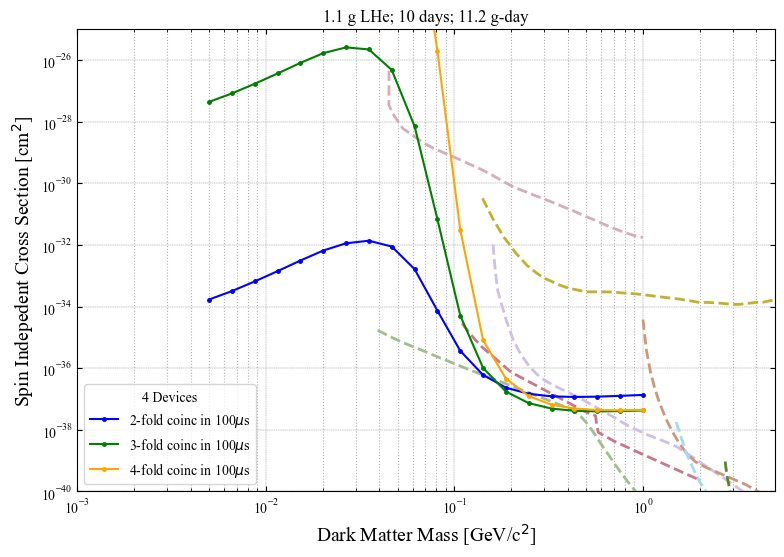

In [7]:
colors = ['blue','green','orange']

for i,t in enumerate(times):
    
    fig, ax = plt.subplots(figsize=(9, 6))
    #plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
    load_and_plot_existing(ax,leg=False,leg_params={'loc':'center left','bbox_to_anchor':(0.8,0.5) } )
    #fig.subplots_adjust(right=0.6)
    # Shrink current axis by 20%
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    
    leg_hands = []
    for j,n in enumerate(coinc):
        lab = '{:d}-fold coinc in {:0.0f}$\mu$s'.format(n,window/1e-6)
        lh, = plt.plot(*(data['{:d}_{:d}'.format(i,j)].T), marker='.',ms=5,label=lab,color=colors[j])
        leg_hands.append(lh)

    ax.set_title('{:0.1f} g LHe; {:0.0f} days; {:0.1f} g-day'.format(mass_det*1e3,times[i],mass_det*1e3*times[i]))
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim(1e-40, 1e-25)
    ax.set_xlim(0.001, 5)
    ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
    ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
    #ax.set_title("Estimated Sensitivity", fontsize=14)

    ax.grid(lw=0.3,ls='--',color='grey')
    ax.grid(which="minor", linestyle='dotted')
    ax.tick_params(which="both", direction="in", right=True, top=True)

    ax.legend(handles=leg_hands,loc='lower left',frameon=True,ncol=1,title='{:d} Devices'.format(n_devices)) #bbox_to_anchor=(0.5, 1.05)
    
    #bbox_extra_artists=(lgd,text)

2
2
2
2
3
3
3
3
4
4
4
4


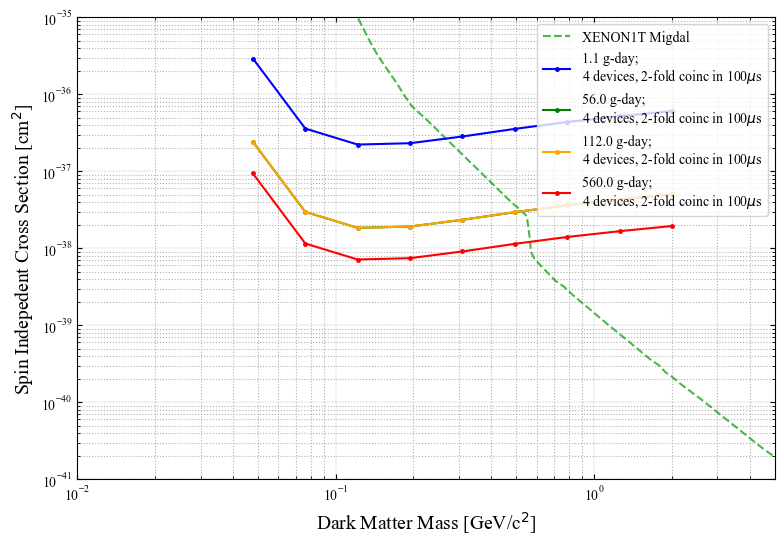

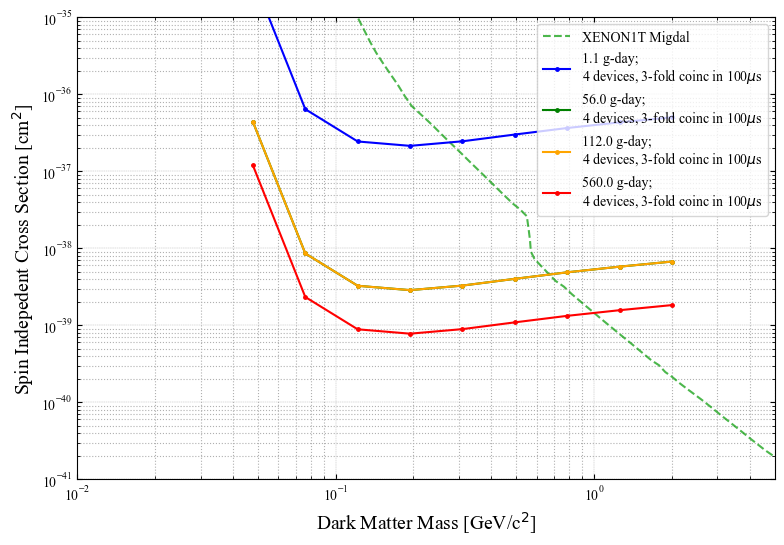

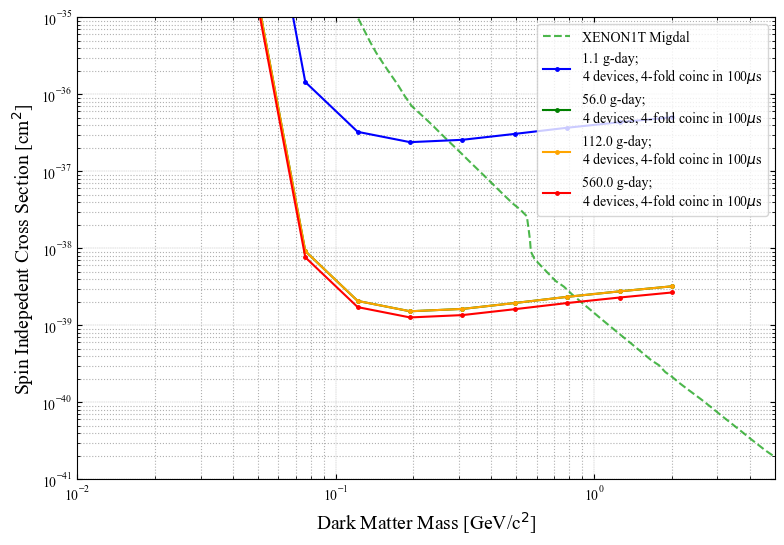

In [12]:
colors = ['blue','green','orange','red']

for j,n in enumerate(coinc):
    
    fig, ax = plt.subplots(figsize=(9, 6))
    plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')

    for i,t in enumerate(times):
        print(coinc[j])
        lab = '{:0.1f} g-day;\n{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(mass_det*1e3*t,n_devices,n,window/1e-6)
        plt.plot(*(data['{:d}_{:d}'.format(i,j)].T), marker='.',ms=5,label=lab,color=colors[i])
    
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim(1e-41, 1e-35)
    ax.set_xlim(0.01, 5)
    ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
    ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
    #ax.set_title("Estimated Sensitivity", fontsize=14)

    ax.grid(lw=0.3,ls='--')
    ax.grid(which="minor", linestyle='dotted')
    ax.tick_params(which="both", direction="in", right=True, top=True)

    ax.legend(loc='upper right',frameon=True)

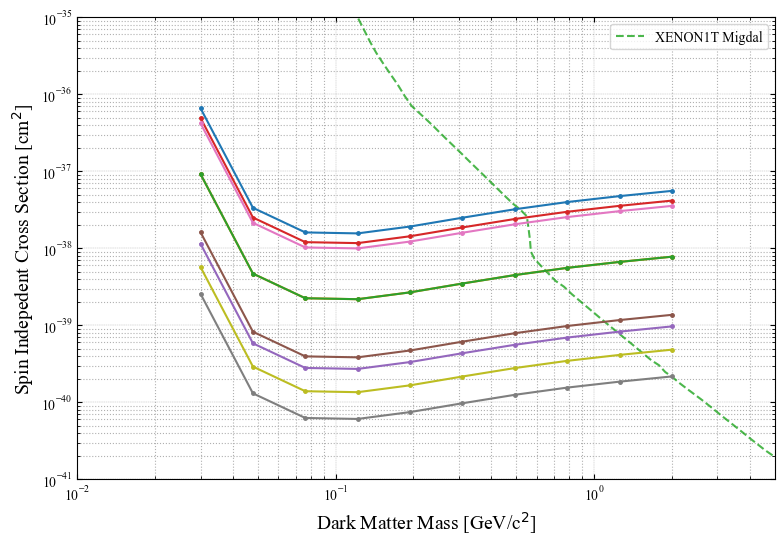

In [5]:

fig, ax = plt.subplots(figsize=(9, 6))

x1tmig = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/XENON1T-Migdal.txt')
#cresst = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/CRESST.txt')

plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
#plt.plot(*(cresst.T),color=(0.8,0.1,0.1,0.7),label='CRESST')

for i,t in enumerate(exposures):
    for j,n in enumerate(coinc):
    
        #lab = 'HeRALD {:0.3f} kg-day;\n{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(SE.exposure,n_devices,coinc,window/1e-6)
        plt.plot(*(data['{:d}_{:d}'.format(i,j)].T), marker='.',ms=5)#,label=lab)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-41, 1e-35)
ax.set_xlim(0.01, 5)
ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
#ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid(lw=0.3,ls='--')
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(loc='upper right',frameon=True)